## Installing packages and importing libraries

In [1]:
!pip install lxml[html_clean] weasyprint PyPDF2
!npm install puppeteer jsdom @mozilla/readability  #JavaScript (Node.js) packages

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 57.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 63.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 850.6/850.6 kB 34.9 MB/s eta 0:00:00
⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏
added 131 packages in 18s
⠏
⠏14 packages are looking for funding
⠏  run `npm fund` for details
⠏npm notice
npm notice New major version of npm available! 10.8.2 -> 11.3.0
npm notice Changelog: https://github.com/npm/cli/releases/tag/v11.3.0
npm notice To update run: npm install -g npm@11.3.0
npm notice
⠏

In [14]:
from lxml import html
import subprocess, json
from bs4 import BeautifulSoup

# not used in main implementation(only used in experimentation)
from PyPDF2 import PdfReader #For counting page in a pdf
import os                    #for renaming file name
import time, copy
import pandas as pd 
from weasyprint import HTML

## Setting up Configuration

In [9]:
# Default configuration dictionary
DEFAULT_CONFIG = {"font_size": 11, "print_mode": "default", "heading_emphasizing_factor": 2.2, "background_color": "white", "text_alignment": "left", "orientation": "portrait", "font_color": "black", "font_family": "Arial, sans-serif", "page_size": "A4", "margin": "15mm", "line_height": 1.5, "show_hyperlink_url": False, "remove_images": False, "remove_tables": False, "checklist_of_titles": "All selected", "column_count": 1, "summarize": False, "summarizing_factor": 0.4, "show_page_no": False, "space_between_paragraphs": 0, "image_or_table_alignment": "Center", "image_or_table_size": "Normal"}

# Default configuration dictionary for different print modes
CONFIG_FOR_MODE = {
    "default":{"font_size": 11, "print_mode": "Default", "heading_emphasizing_factor": 2.2, "background_color": "white", "text_alignment": "left", "orientation": "portrait", "font_color": "black", "font_family": "Arial, sans-serif", "page_size": "A4", "margin": "15mm", "line_height": 1.5, "show_hyperlink_url": False, "remove_images": False, "remove_tables": False, "checklist_of_titles": "All selected", "column_count": 1, "summarize": False, "summarizing_factor": 0.4, "show_page_no": False, "space_between_paragraphs": 0, "image_or_table_alignment": "Center", "image_or_table_size": "Normal"},
    "save_pages": {"font_size": 9, "print_mode": "save_pages", "heading_emphasizing_factor": 1.9, "background_color": "white", "text_alignment": "left", "orientation": "portrait", "font_color": "black", "font_family": "Helvetica Neue, Arial, sans-serif", "page_size": "A4", "margin": "10mm", "line_height": 1.2, "show_hyperlink_url": False, "remove_images": False, "remove_tables": False, "checklist_of_titles": "All selected", "column_count": 1, "summarize": False, "summarizing_factor": 0.4, "show_page_no": False, "space_between_paragraphs": 0, "image_or_table_alignment": "Side", "image_or_table_size": "Small"},
    "save_ink": {"font_size": 9, "print_mode": "save_ink", "heading_emphasizing_factor": 1.9, "background_color": "white", "text_alignment": "left", "orientation": "portrait", "font_color": "dimgray", "font_family": "Calibri, Arial, sans-serif", "page_size": "A4", "margin": "15mm", "line_height": 1.5, "show_hyperlink_url": False, "remove_images": False, "remove_tables": False, "checklist_of_titles": "All selected", "column_count": 1, "summarize": False, "summarizing_factor": 0.4, "show_page_no": False, "space_between_paragraphs": 0, "image_or_table_alignment": "Side", "image_or_table_size": "Small"},
    "high_quality": {"font_size": 12, "print_mode": "high_quality", "heading_emphasizing_factor": 2.4, "background_color": "white", "text_alignment": "left", "orientation": "portrait", "font_color": "black", "font_family": "Arial, sans-serif", "page_size": "A4", "margin": "15mm", "line_height": 1.7, "show_hyperlink_url": False, "remove_images": False, "remove_tables": False, "checklist_of_titles": "All selected", "column_count": 1, "summarize": False, "summarizing_factor": 0.8, "show_page_no": False, "space_between_paragraphs": "Increase", "image_or_table_alignment": "Center", "image_or_table_size": "Normal"}}

# Setting DEFAULT_CONFIG as congugration initially
CONFIG = DEFAULT_CONFIG

#Take input of CHANGE_CONFIG from user or chatbot
CHANGE_CONFIG = {"font_size":11, "line_height":1.4}
CONFIG.update(CHANGE_CONFIG)

#To be run only if print_mode is changed
# CONFIG.update(CONFIG_FOR_MODE[CONFIG["print_mode"]])

# Different configs and urls for experimentation
CONFIGS = [
    dict(CONFIG, orientation="portrait", column_count=1),
    dict(CONFIG, orientation="portrait", column_count=2),
    dict(CONFIG, orientation="landscape", column_count=1),
    dict(CONFIG, orientation="landscape", column_count=2)
]

URLS = ["https://www.spiceworks.com/tech/artificial-intelligence/articles/what-is-ml/",
        "https://sallysbakingaddiction.com/easy-healthy-dinner-baked-pineapple-teriyaki-chicken/",
        "https://sallysbakingaddiction.com/skillet-chicken-with-creamy-cilantro-lime-sauce/",
        "https://en.wikipedia.org/wiki/Interstellar_(film)", 
        "https://www.vegrecipesofindia.com/paneer-bhurji-scrambled-cottage-cheese-with-spices/#h-about-paneer-bhurji",
        "https://www.geeksforgeeks.org/web-browser/"]

In [5]:
# Need to run one time
node_script = '''
const puppeteer = require('puppeteer');
const { Readability } = require('@mozilla/readability');
const { JSDOM } = require('jsdom');

const url = process.argv[2];

(async () => {
  const browser = await puppeteer.launch({
    headless: "new",
    args: ["--no-sandbox"]
  });
  const page = await browser.newPage();

  await page.goto(url, { waitUntil: "networkidle2", timeout: 0 });

  const html = await page.content();
  const dom = new JSDOM(html, { url });

  const reader = new Readability(dom.window.document);
  const article = reader.parse();

  console.log(JSON.stringify({
    title: article.title,
    content: article.content
  }));

  await browser.close();
})();
'''

with open("extract_readability.js", "w") as f:
    f.write(node_script)

In [6]:
def css_format(config):
    """
    Generates a customizable CSS string for optimizing web pages for print.
    """
    hyperlink_css = ""
    if config['show_hyperlink_url']:
        hyperlink_css = """
    /* Ensure links show their URLs */
    a {{
      text-decoration: none;
    }}
    a[href]:after {
        content: " (" attr(href) ")";
    }
    """
        
    page_number_css = ""
    if config['show_page_no']:
        page_number_css = f"""
        @bottom-center {{
            content: counter(page) " / " counter(pages);
            font-size: {config['font_size']*0.8}pt;
        }}
        """
        
    css_print_format = f"""
@media print {{
    /* Set background and text properties */
    body {{
        background-color: {config['background_color']} !important;
        color: {config['font_color']} !important;
        font-size: {config['font_size']}pt;
        font-family: {config['font_family']};
        line-height: {config['line_height']};
        margin: 0;
        padding: 0;
        column-count: {config['column_count']};
        column-gap: 20px;
        text-align: {config['text_alignment']};
    }}
    
    /* Set page size and margins */
    @page {{
        size: {config['page_size']} {config['orientation']};
        margin: {config['margin']};

        {page_number_css}
    }}
    
    /* Ensure images fit within the print area */
    img {{
        max-width: 100% !important;
        height: auto !important;
        page-break-inside: avoid;
        display: block;
        margin: auto;
    }}

    {hyperlink_css}
    
    /* Ensure main-heading spans full width */
    .main-heading {{
        font-size: {config['font_size'] * config['heading_emphasizing_factor'] * 1.25}pt !important;
        font-weight: bold !important;
        text-align: left;
        display: block !important;
        margin-top: 20px !important;
        color: {config['font_color']} !important;
        column-span: all; /* Ensures heading spans across all columns */
        width: 100%;
        break-before: always; /* Forces it to start on a new line */
    }}
    
    h1 {{
        font-size: {config['font_size'] * config['heading_emphasizing_factor']}pt !important;
        font-weight: bold !important;
        text-align: left;
        display: block !important;
        margin-top: 20px !important;
        color: {config['font_color']} !important;
    }}
    
    h2 {{
        font-size: {config['font_size'] * config['heading_emphasizing_factor'] * 0.8}pt !important;
        font-weight: bold !important;
        text-align: left;
        margin-top: 15px !important;
        color: {config['font_color']} !important;
    }}
    
    h3 {{
        font-size: {config['font_size'] * config['heading_emphasizing_factor'] * 0.6}pt !important;
        font-weight: bold;
        text-align: left;
        margin-top: 10px;
        color: {config['font_color']};
    }}
}}
"""
    return css_print_format

def extract_main_content(url):
    try:
        result = subprocess.run(
            ['node', 'extract_readability.js', url],
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE,
            text=True,
            check=True
        )
        data = json.loads(result.stdout)
        title = data.get('title', 'No Title')
        content_html = data.get('content', '')

        soup = BeautifulSoup(content_html, 'html.parser')
        for tag in soup(['script', 'style', 'noscript']):
            tag.decompose()

        return title, soup.prettify()

    except subprocess.CalledProcessError as e:
        print("Node.js Error:", e.stderr)
        return None, None

def build_full_html_with_print_css(title, content_html, url, css_print_format):
    """
    Build full HTML with embedded title, content, and print CSS formatting.
    """
    base_html = f"""<!DOCTYPE html>
    <html lang="en">
    <head>
        <meta charset="utf-8">
        <title>{title}</title>
        <style>
            .url-text {{
                color: blue;
            }}
        </style>
    </head>
    <body>
        <h1 class="main-heading">{title}</h1>
        {content_html}
    </body>
    </html>"""

    tree = html.fromstring(base_html)
    head = tree.find("head")
    
    if head is None:
        head = html.Element("head")
        tree.insert(0, head)
    
    style = html.Element("style")
    style.text = css_print_format
    head.append(style)
    
    return html.tostring(tree, pretty_print=True, encoding="unicode")


def generate_pdf(html_content, output_pdf="output.pdf"):
    """
    Convert the given HTML content into a PDF using WeasyPrint.
    """
    HTML(string=html_content).write_pdf(output_pdf)

def main(url, config):
    """
    Main function to generate PDF from a webpage.
    """
    
    # Generate PDF by chaining steps
    generate_pdf(
        build_full_html_with_print_css(
            *extract_main_content(url), 
            url,
            css_format(config)
        ),
        "output.pdf"
    )

## Generating PDF output

In [10]:
#generating single output
if __name__ == "__main__":
    main(URLS[0], CONFIG)

## Saving Generation Time

In [11]:
#Generating multiple outputs
def generate_history(CONFIGS, URLS):
    output_number = 1
    history = pd.DataFrame(columns=["url", "time_taken","num_pages","config","output_filename"])
    
    for URL in URLS:
        print("Generating for url:",URL)
        for CONFIG in CONFIGS:
            if __name__ == "__main__":
                start_time = time.time()
                main(URL, CONFIG)
                end_time = time.time()
                time_taken = end_time - start_time
            
            # Rename output.pdf to output_<number>.pdf
            output_filename = f"output_{output_number}.pdf"
            if os.path.exists("output.pdf"):
                os.rename("output.pdf", output_filename)
                output_number += 1
            
            # Get number of pages in output PDF
            num_pages = len(PdfReader(output_filename).pages)
            
            # Saving values in a dataframe
            history = pd.concat([history, pd.DataFrame([{"url": URL, "time_taken": time_taken,"num_pages":num_pages,"config":CONFIG,"output_filename": output_filename}])], ignore_index=True)
    return history

In [10]:
history = generate_history(CONFIGS, URLS)
history['time_per_page'] = history['time_taken'] / history['num_pages']
history

Generating for url: https://www.spiceworks.com/tech/artificial-intelligence/articles/what-is-ml/


/tmp/ipykernel_31/1090361708.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  history = pd.concat([history, pd.DataFrame([{"url": URL, "time_taken": time_taken,"num_pages":num_pages,"config":CONFIG,"output_filename": output_filename}])], ignore_index=True)


Generating for url: https://sallysbakingaddiction.com/easy-healthy-dinner-baked-pineapple-teriyaki-chicken/
Generating for url: https://sallysbakingaddiction.com/skillet-chicken-with-creamy-cilantro-lime-sauce/
Generating for url: https://en.wikipedia.org/wiki/Interstellar_(film)
Generating for url: https://www.vegrecipesofindia.com/paneer-bhurji-scrambled-cottage-cheese-with-spices/#h-about-paneer-bhurji
Generating for url: https://www.geeksforgeeks.org/web-browser/


,url,time_taken,num_pages,config,output_filename
0,https://www.spiceworks.com/tech/artificial-int...,16.158559,11,"{'font_size': 11, 'print_mode': 'default', 'he...",output_1.pdf
1,https://www.spiceworks.com/tech/artificial-int...,16.154839,8,"{'font_size': 11, 'print_mode': 'default', 'he...",output_2.pdf
2,https://www.spiceworks.com/tech/artificial-int...,14.050169,15,"{'font_size': 11, 'print_mode': 'default', 'he...",output_3.pdf
3,https://www.spiceworks.com/tech/artificial-int...,14.339626,9,"{'font_size': 11, 'print_mode': 'default', 'he...",output_4.pdf
4,https://sallysbakingaddiction.com/easy-healthy...,19.466127,13,"{'font_size': 11, 'print_mode': 'default', 'he...",output_5.pdf
5,https://sallysbakingaddiction.com/easy-healthy...,14.640402,5,"{'font_size': 11, 'print_mode': 'default', 'he...",output_6.pdf
6,https://sallysbakingaddiction.com/easy-healthy...,12.972016,16,"{'font_size': 11, 'print_mode': 'default', 'he...",output_7.pdf
7,https://sallysbakingaddiction.com/easy-healthy...,13.258615,9,"{'font_size': 11, 'print_mode': 'default', 'he...",output_8.pdf
8,https://sallysbakingaddiction.com/skillet-chic...,20.052477,15,"{'font_size': 11, 'print_mode': 'default', 'he...",output_9.pdf
9,https://sallysbakingaddiction.com/skillet-chic...,11.707466,5,"{'font_size': 11, 'print_mode': 'default', 'he...",output_10.pdf


In [13]:
history.to_excel('history.xlsx', index=False)

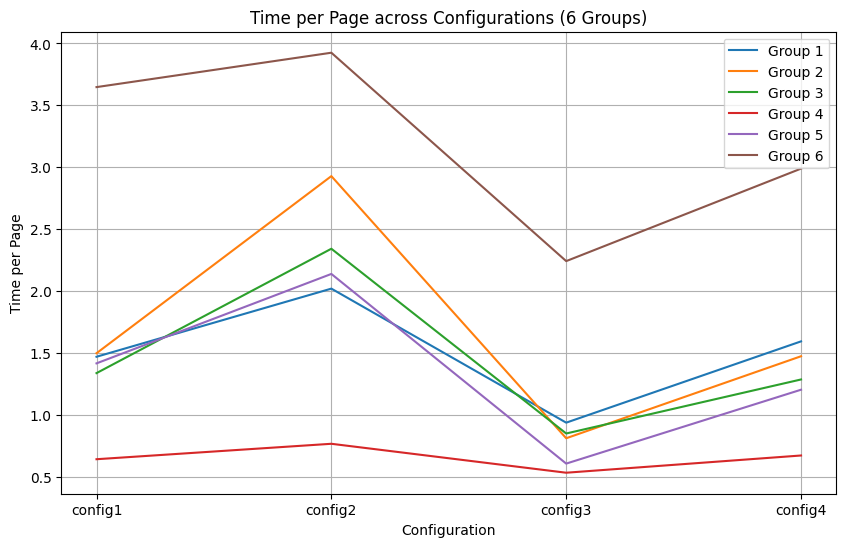

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Create 6 groups of 4 from the time_per_page column
groups = []
for i in range(0, 24, 4):
    group = history['time_per_page'].iloc[i:i+4].reset_index(drop=True)
    groups.append(group)

# X-axis labels
configs = ['config1', 'config2', 'config3', 'config4']

# Plotting
plt.figure(figsize=(10, 6))

for idx, group in enumerate(groups):
    plt.plot(configs, group, label=f'Group {idx+1}')  # Default colors used here

plt.xlabel('Configuration')
plt.ylabel('Time per Page')
plt.title('Time per Page across Configurations (6 Groups)')
plt.legend()
plt.grid(True)
plt.show()

- portrait orientation takes more time per page than landscape
- 2-column format takes more time per page than 1-column format

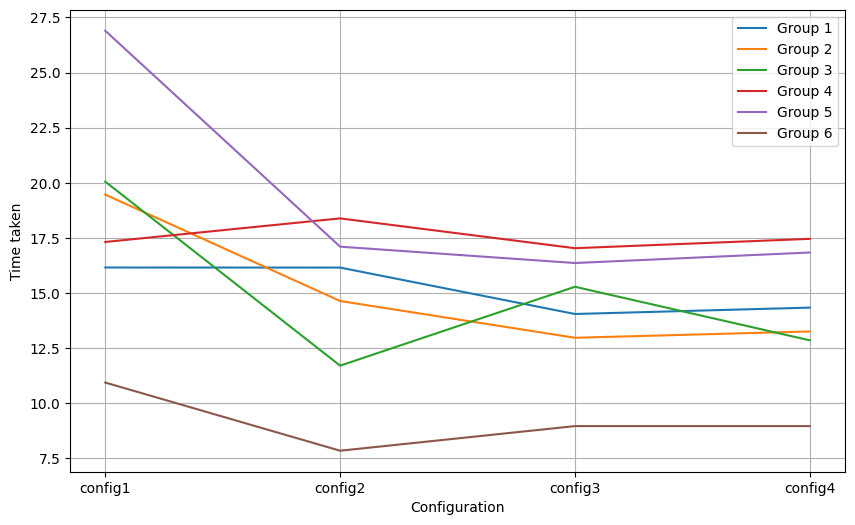

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Create 6 groups of 4 from the time_per_page column
groups = []
for i in range(0, 24, 4):
    group = history['time_taken'].iloc[i:i+4].reset_index(drop=True)
    groups.append(group)

# X-axis labels
configs = ['config1', 'config2', 'config3', 'config4']

# Plotting
plt.figure(figsize=(10, 6))

for idx, group in enumerate(groups):
    plt.plot(configs, group, label=f'Group {idx+1}')  # Default colors used here

plt.xlabel('Configuration')
plt.ylabel('Time taken')
plt.legend()
plt.grid(True)
plt.show()

- [portrait, 1-column format] is taking more time